# Analysis of various country GDP 2019-2021

I have got this dataset from kaggle.com. The dataset shows the estimation of GDP by various International Organizations. It shows the country, the region, the estimate and the year of estimate. This data has been prepared by "Abhinantan K" and sourced from Wikipedia. I will be trying to use few mathematical methods and visualisation tools to find some insights from the dataset. I will be using Numpy, Pandas, Matplotlib and Seaborn Python libraries to analyse and visualise the dataset. I will try to incorporate many of the data analysis techniques taught in the brilliant course [Data Analysis with Python: Zero to Pandas](https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas). 

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

We can download the dataset from kaggle using opendatasets python package.

In [134]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [135]:
import numpy as np

In [136]:
dataset_url = 'www.kaggle.com/abinanthank/gross-domestic-product'

In [137]:
import pandas as pd
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\gross-domestic-product" (use force=True to force download)


In [138]:
import os
os.listdir('.\gross-domestic-product')

['GDP.csv']

In [139]:
import pandas as pd
dataset = pd.read_csv('GDP.csv')

In [140]:
dataset.head()

,Country,Region,Estimate(IMF),Year(IMF),Estimate(UN),Year(UN),Estimate(World Bank),Year(World Bank)
0,United States,Americas,22675271.0,2021,21433226,2019,20936600.0,2020
1,China,Asia,16642318.0,[n 2]2021,14342933,[n 3]2019,14722731.0,2020
2,Japan,Asia,5378136.0,2021,5082465,2019,4975415.0,2020
3,Germany,Europe,4319286.0,2021,3861123,2019,3806060.0,2020
4,United Kingdom,Europe,3124650.0,2021,2826441,2019,2707744.0,2020


The dataset has been downloaded and extracted.

Let us save and upload our work to Jovian before continuing.

In [141]:
project_name = "gdp-estimates-analysis"

In [142]:
!pip install jovian --upgrade -q

In [143]:
import jovian

In [144]:
jovian.commit(project=project_name, filename='gdp-estimates-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "atanu-manna/gdp-estimates-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/atanu-manna/gdp-estimates-analysis


'https://jovian.ai/atanu-manna/gdp-estimates-analysis'

## Data Preparation and Cleaning

Below I have tried to clean the dataset and removed the cells having no GDP figures.



In [145]:
dataset.head()

,Country,Region,Estimate(IMF),Year(IMF),Estimate(UN),Year(UN),Estimate(World Bank),Year(World Bank)
0,United States,Americas,22675271.0,2021,21433226,2019,20936600.0,2020
1,China,Asia,16642318.0,[n 2]2021,14342933,[n 3]2019,14722731.0,2020
2,Japan,Asia,5378136.0,2021,5082465,2019,4975415.0,2020
3,Germany,Europe,4319286.0,2021,3861123,2019,3806060.0,2020
4,United Kingdom,Europe,3124650.0,2021,2826441,2019,2707744.0,2020


In [146]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               213 non-null    object 
 1   Region                213 non-null    object 
 2   Estimate(IMF)         195 non-null    float64
 3   Year(IMF)             195 non-null    object 
 4   Estimate(UN)          213 non-null    int64  
 5   Year(UN)              213 non-null    object 
 6   Estimate(World Bank)  207 non-null    float64
 7   Year(World Bank)      207 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 13.4+ KB


Changed column names and added year in the column to simplify the dataset

In [147]:
dataset = dataset.rename(columns={'Estimate(IMF)':'estimate_2021_imf','Estimate(UN)': \
    'estimate_2019_un', 'Estimate(World Bank)':'estimate_2020_wb'})

As years have been added in the column header so we can drop the redundant year column

In [148]:
dataset = dataset.drop(['Year(IMF)','Year(UN)','Year(World Bank)'], axis=1)

In [149]:
dataset.head()

,Country,Region,estimate_2021_imf,estimate_2019_un,estimate_2020_wb
0,United States,Americas,22675271.0,21433226,20936600.0
1,China,Asia,16642318.0,14342933,14722731.0
2,Japan,Asia,5378136.0,5082465,4975415.0
3,Germany,Europe,4319286.0,3861123,3806060.0
4,United Kingdom,Europe,3124650.0,2826441,2707744.0


To keep all columns in order, "estimate_2021_imf" will be shifted to last

In [150]:
temp = dataset[['Country','estimate_2021_imf']].copy()

In [151]:
dataset = dataset.drop(['estimate_2021_imf'], axis=1)

In [152]:
dataset = dataset.merge(temp,on='Country')

Finding missing data cell

In [153]:
dataset.isna().sum()

Country               0
Region                0
estimate_2019_un      0
estimate_2020_wb      6
estimate_2021_imf    18
dtype: int64

In [154]:
dataset = dataset.dropna()


In [155]:
dataset.isna().sum()

Country              0
Region               0
estimate_2019_un     0
estimate_2020_wb     0
estimate_2021_imf    0
dtype: int64

In [156]:
dataset.isna().count()

Country              195
Region               195
estimate_2019_un     195
estimate_2020_wb     195
estimate_2021_imf    195
dtype: int64

18 rows having NAN values had to be removed from the total of 213 rows. So right now after removing we are able to have 195 countries.

In [157]:
dataset.head(5)

,Country,Region,estimate_2019_un,estimate_2020_wb,estimate_2021_imf
0,United States,Americas,21433226,20936600.0,22675271.0
1,China,Asia,14342933,14722731.0,16642318.0
2,Japan,Asia,5082465,4975415.0,5378136.0
3,Germany,Europe,3861123,3806060.0,4319286.0
4,United Kingdom,Europe,2826441,2707744.0,3124650.0


In [158]:
import jovian

In [159]:
jovian.commit(project=project_name, filename='gdp-estimates-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "atanu-manna/gdp-estimates-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/atanu-manna/gdp-estimates-analysis


'https://jovian.ai/atanu-manna/gdp-estimates-analysis'

## Exploratory Analysis and Visualization

We will try to visualise GDP data of 5 regions accross the globe for 3 consecutive years.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [160]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams["figure.autolayout"] = True

Average GDP of 5 region are compared for 3 years.

In [161]:
americas_gdp = dataset[dataset['Region'] == 'Americas'][['estimate_2019_un',\
    'estimate_2020_wb','estimate_2021_imf']].mean()
asia_gdp = dataset[dataset['Region'] == 'Asia'][['estimate_2019_un',\
    'estimate_2020_wb','estimate_2021_imf']].mean()
africa_gdp = dataset[dataset['Region'] == 'Africa'][['estimate_2019_un',\
    'estimate_2020_wb','estimate_2021_imf']].mean()
europe_gdp = dataset[dataset['Region'] == 'Europe'][['estimate_2019_un',\
    'estimate_2020_wb','estimate_2021_imf']].mean()
oceania_gdp = dataset[dataset['Region'] == 'Oceania'][['estimate_2019_un',\
    'estimate_2020_wb','estimate_2021_imf']].mean()

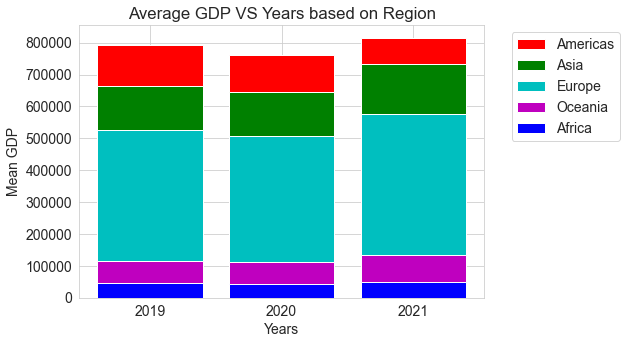

In [162]:
sns.set_style("whitegrid")
plt.bar(['2019', '2020', '2021'], americas_gdp, color='r')
plt.bar(['2019', '2020', '2021'], asia_gdp,color='g')
plt.bar(['2019', '2020', '2021'], europe_gdp,color='c')
plt.bar(['2019', '2020', '2021'], oceania_gdp,color='m')
plt.bar(['2019', '2020', '2021'], africa_gdp,color='b')
plt.legend(['Americas','Asia','Europe','Oceania','Africa'], \
    bbox_to_anchor=(1.05, 1.0))
plt.xlabel("Years")
plt.ylabel("Mean GDP")
plt.title("Average GDP VS Years based on Region")
plt.show()


Trying to visualise and compare average GDP of the region year wise. We can clearly see that average gdp in the American continent is always high respective to other regions for three consecutive years. We can also see there has been a dip in average GDP in the year 2020. This might be true as because due to covid pandemic the GDP was affected throughout the globe.

Sum of GDP of 5 region are compared for 3 years.

In [163]:
americas_gdp_sum = dataset[dataset['Region'] == 'Americas'][['estimate_2019_un',\
    'estimate_2020_wb','estimate_2021_imf']].sum()
asia_gdp_sum = dataset[dataset['Region'] == 'Asia'][['estimate_2019_un',\
    'estimate_2020_wb','estimate_2021_imf']].sum()
africa_gdp_sum = dataset[dataset['Region'] == 'Africa'][['estimate_2019_un',\
    'estimate_2020_wb','estimate_2021_imf']].sum()
europe_gdp_sum = dataset[dataset['Region'] == 'Europe'][['estimate_2019_un',\
    'estimate_2020_wb','estimate_2021_imf']].sum()
oceania_gdp_sum = dataset[dataset['Region'] == 'Oceania'][['estimate_2019_un',\
    'estimate_2020_wb','estimate_2021_imf']].sum()

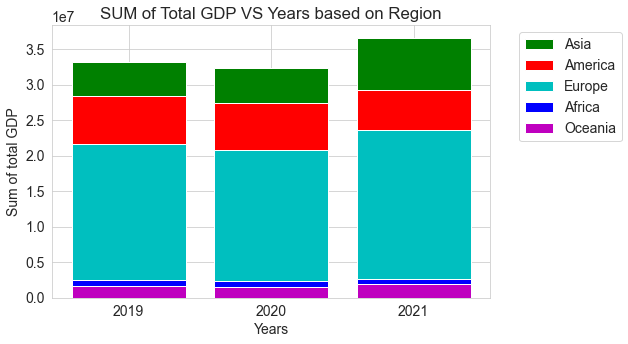

In [164]:
sns.set_style("whitegrid")
plt.bar(['2019', '2020', '2021'], asia_gdp_sum, color='g')
plt.bar(['2019', '2020', '2021'], americas_gdp_sum, color='r')
plt.bar(['2019', '2020', '2021'], europe_gdp_sum, color='c')
plt.bar(['2019', '2020', '2021'], africa_gdp_sum, color='b')
plt.bar(['2019', '2020', '2021'], oceania_gdp_sum, color='m')
plt.legend(['Asia','America','Europe','Africa','Oceania'], \
    bbox_to_anchor=(1.05, 1.0))
plt.xlabel("Years")
plt.ylabel("Sum of total GDP")
plt.title("SUM of Total GDP VS Years based on Region")
plt.show()

Trying to visualise and compare total GDP of the region year wise. We can clearly see that total gdp in the Asian continent is always high respective to other regions for three consecutive years. We can also see there has been a dip in total GDP in the year 2020. This might be true as because due to covid pandemic the GDP was affected throughout the globe.

Average GDP of 5 regions visualised over 3 years using line chart.

In [165]:
e_2019_avg = dataset.groupby(['Region'])[('estimate_2019_un')].mean()
e_2020_avg = dataset.groupby(['Region'])[('estimate_2020_wb')].mean()
e_2021_avg = dataset.groupby(['Region'])[('estimate_2021_imf')].mean()


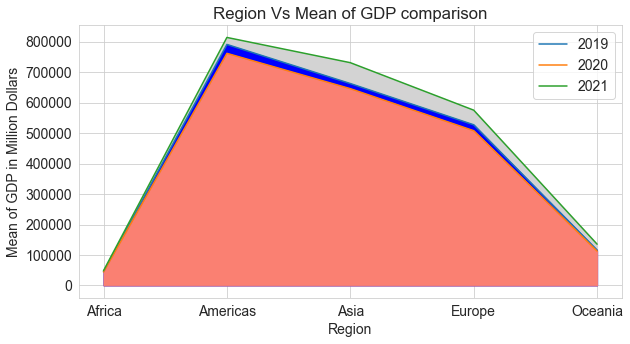

In [166]:
sns.set_style("whitegrid")
plt.plot(e_2021_avg.keys(), e_2019_avg)
plt.plot(e_2019_avg.keys(), e_2020_avg)
plt.plot(e_2020_avg.keys(), e_2021_avg)
plt.fill_between(e_2021_avg.keys(), e_2021_avg,0,color='lightgrey')
plt.fill_between(e_2019_avg.keys(), e_2019_avg,0,color='blue')
plt.fill_between(e_2020_avg.keys(), e_2020_avg,0,color='salmon')
plt.xlabel('Region')
plt.ylabel('Mean of GDP in Million Dollars')
plt.title('Region Vs Mean of GDP comparison')
plt.legend(['2019','2020','2021'])
plt.show()

Trying to visualise and compare Average GDP of the region year wise. We can also clearly infer that there has been a dip in average GDP in the year 2020. This might be true as because due to covid pandemic the GDP was affected throughout the globe. We can also infer from the graph that Asia and Europe has recovered well after 2020 than others.

Sum GDP of 5 regions visualised over 3 years using line chart.

In [167]:
e_2019 = dataset.groupby(['Region'])[('estimate_2019_un')].sum()
e_2020 = dataset.groupby(['Region'])[('estimate_2020_wb')].sum()
e_2021 = dataset.groupby(['Region'])[('estimate_2021_imf')].sum()

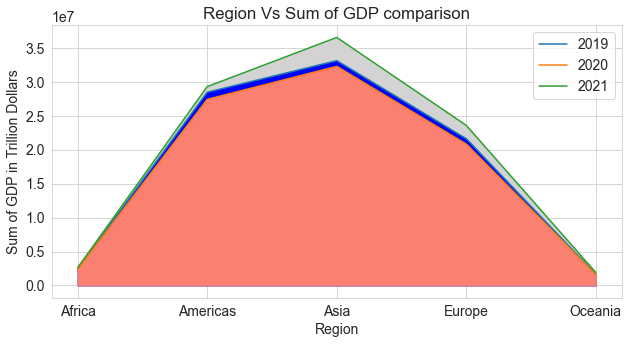

In [168]:
sns.set_style("whitegrid")
plt.plot(e_2019.keys(), e_2019)
plt.plot(e_2020.keys(), e_2020)
plt.plot(e_2021.keys(), e_2021)
plt.fill_between(e_2019.keys(), e_2021,0,color='lightgrey')
plt.fill_between(e_2020.keys(), e_2019,0,color='blue')
plt.fill_between(e_2021.keys(), e_2020,0,color='salmon')
plt.xlabel('Region')
plt.ylabel('Sum of GDP in Trillion Dollars')
plt.title('Region Vs Sum of GDP comparison')
plt.legend(['2019','2020','2021'])
plt.show()

Trying to visualise and compare SUM of GDP of the region year wise. We can also clearly infer that there has been a dip in average GDP in the year 2020. This might be true as because due to covid pandemic the GDP was affected throughout the globe. We can also infer from the graph that Asia and Europe has recovered well after 2020 than others.

Created a dashboard by consolidating all the above graphs.

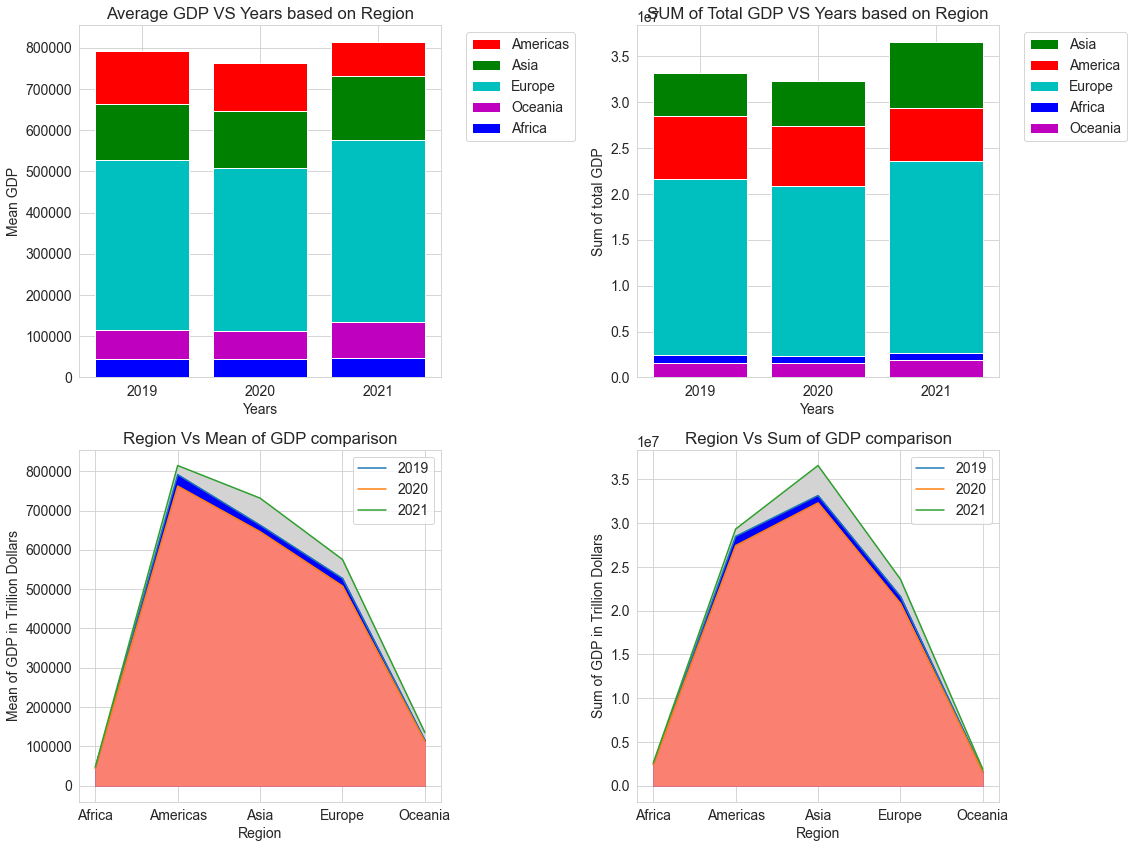

In [169]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plotting Mean GDP Region wise for 3 years
sns.set_style("whitegrid")
axes[0,0].bar(['2019', '2020', '2021'], americas_gdp, color='r')
axes[0,0].bar(['2019', '2020', '2021'], asia_gdp,color='g')
axes[0,0].bar(['2019', '2020', '2021'], europe_gdp,color='c')
axes[0,0].bar(['2019', '2020', '2021'], oceania_gdp,color='m')
axes[0,0].bar(['2019', '2020', '2021'], africa_gdp,color='b')
axes[0,0].legend(['Americas','Asia','Europe','Oceania','Africa'], \
    bbox_to_anchor=(1.05, 1.0))
axes[0,0].set_xlabel("Years")
axes[0,0].set_ylabel("Mean GDP")
axes[0,0].set_title("Average GDP VS Years based on Region")

# Plotting Sum total of GDP Region wise for 3 years
axes[0,1].bar(['2019', '2020', '2021'], asia_gdp_sum, color='g')
axes[0,1].bar(['2019', '2020', '2021'], americas_gdp_sum, color='r')
axes[0,1].bar(['2019', '2020', '2021'], europe_gdp_sum, color='c')
axes[0,1].bar(['2019', '2020', '2021'], africa_gdp_sum, color='b')
axes[0,1].bar(['2019', '2020', '2021'], oceania_gdp_sum, color='m')
axes[0,1].legend(['Asia','America','Europe','Africa','Oceania'], \
    bbox_to_anchor=(1.05, 1.0))
axes[0,1].set_xlabel("Years")
axes[0,1].set_ylabel("Sum of total GDP")
axes[0,1].set_title("SUM of Total GDP VS Years based on Region")

# Plotting Mean GDP Region wise for 3 years
axes[1,0].plot(e_2019_avg.keys(), e_2019_avg)
axes[1,0].plot(e_2020_avg.keys(), e_2020_avg)
axes[1,0].plot(e_2021_avg.keys(), e_2021_avg)
axes[1,0].fill_between(e_2021_avg.keys(), e_2021_avg,0,color='lightgrey')
axes[1,0].fill_between(e_2019_avg.keys(), e_2019_avg,0,color='blue')
axes[1,0].fill_between(e_2020_avg.keys(), e_2020_avg,0,color='salmon')
axes[1,0].set_xlabel('Region')
axes[1,0].set_ylabel('Mean of GDP in Trillion Dollars')
axes[1,0].set_title('Region Vs Mean of GDP comparison')
axes[1,0].legend(['2019','2020','2021'])

# Plotting Sum of GDP Region wise for 3 years
axes[1,1].plot(e_2019.keys(), e_2019)
axes[1,1].plot(e_2020.keys(), e_2020)
axes[1,1].plot(e_2021.keys(), e_2021)
axes[1,1].fill_between(e_2021.keys(), e_2021,0,color='lightgrey')
axes[1,1].fill_between(e_2019.keys(), e_2019,0,color='blue')
axes[1,1].fill_between(e_2020.keys(), e_2020,0,color='salmon')
axes[1,1].set_xlabel('Region')
axes[1,1].set_ylabel('Sum of GDP in Trillion Dollars')
axes[1,1].set_title('Region Vs Sum of GDP comparison')
plt.legend(['2019','2020','2021'])
plt.show()

I have tried to prepare a dashboard using earlier visualisation so that we can have a consolidated picture of the GDP for every region for 3 years.

Let us save and upload our work to Jovian before continuing

In [170]:
import jovian

In [171]:
jovian.commit(project=project_name, filename='gdp-estimates-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "atanu-manna/gdp-estimates-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/atanu-manna/gdp-estimates-analysis


'https://jovian.ai/atanu-manna/gdp-estimates-analysis'

## Asking and Answering Questions

We will try to explore the GDP dataset and will try to find some insights.



In [172]:
dataset.head(5)

,Country,Region,estimate_2019_un,estimate_2020_wb,estimate_2021_imf
0,United States,Americas,21433226,20936600.0,22675271.0
1,China,Asia,14342933,14722731.0,16642318.0
2,Japan,Asia,5082465,4975415.0,5378136.0
3,Germany,Europe,3861123,3806060.0,4319286.0
4,United Kingdom,Europe,2826441,2707744.0,3124650.0


#### Q1: Is Average percentage change in GDP for the whole Asian region from 2019 - 2021 is greater than 2020 - 2021? 

In [173]:
asia_gdp = dataset[dataset['Region'] == 'Asia'][['estimate_2019_un',\
    'estimate_2020_wb','estimate_2021_imf']]

In [174]:
percent_change_19_21 = round((asia_gdp.mean()['estimate_2021_imf']-asia_gdp.mean()['estimate_2019_un']) \
    / (asia_gdp.mean()['estimate_2019_un'])*100,2)
percent_change_20_21 = round((asia_gdp.mean()['estimate_2021_imf']-asia_gdp.mean()['estimate_2020_wb']) \
    / (asia_gdp.mean()['estimate_2020_wb'])*100,2)

In [175]:
print("Average percentage change in GDP for the whole Asian region from \
2019 - 2021 ({}%) is not greater than 2020 - 2021 ({}%)"\
        .format(percent_change_19_21,percent_change_20_21))

Average percentage change in GDP for the whole Asian region from 2019 - 2021 (10.33%) is not greater than 2020 - 2021 (13.21%)


#### Q2: Overall GDP for all region between 2019 and 2020 is greater in which year?

In [176]:
dataset['estimate_2019_un'].mean() > dataset['estimate_2020_wb'].mean()

True

In [177]:
print("Overall GDP for {} countries is greater in the year 2019 than 2020."\
    .format(len(dataset)))

Overall GDP for 195 countries is greater in the year 2019 than 2020.


#### Q3: How many countries had GDP greater in 2019 than 2020?

In [178]:
num = (dataset['estimate_2019_un'] > dataset['estimate_2020_wb']).sum()

In [179]:
print("There are a total of {} countries out of {} had GDP greater in 2019 \
than 2020.".format(num,len(dataset)))

There are a total of 128 countries out of 195 had GDP greater in 2019 than 2020.


#### Q4: Which region has the most number of countries that has greater GDP in 2019 than 2020?

In [180]:
greater = dataset[dataset['estimate_2019_un'] < dataset['estimate_2020_wb']]\
    [['Country', 'Region']]

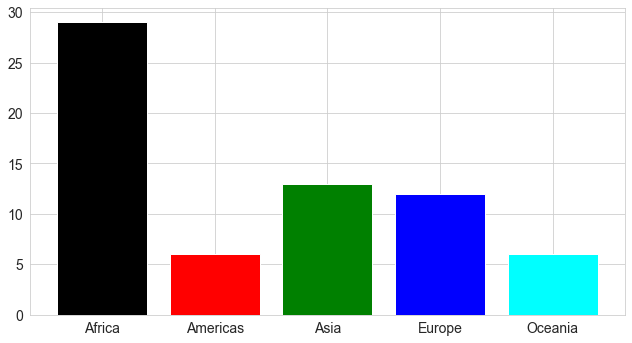

In [181]:
sub = greater.groupby('Region')[['Country']].count()
sns.set_style('whitegrid')
plt.bar(['Africa','Americas','Asia','Europe','Oceania'],sub['Country'],\
color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

In [182]:
print("From the above chart we can easily gather that Africa has the most number \
of countries ie. {}".format(sub.Country.max()))

From the above chart we can easily gather that Africa has the most number of countries ie. 29


#### Q5: Which region has the least number of countries that has greater GDP in 2019 than 2020?

In [183]:
least = dataset[dataset['estimate_2019_un'] < dataset['estimate_2020_wb']]\
    [['Country', 'Region']]

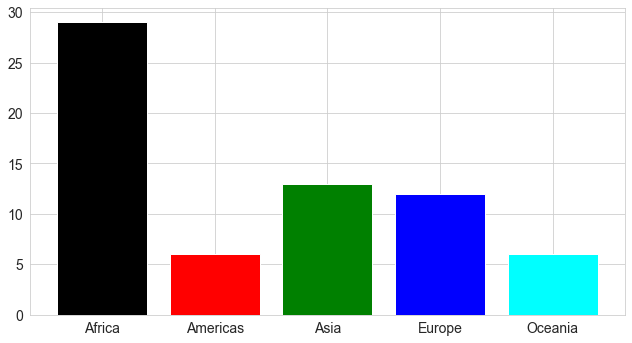

In [184]:
sub_least = least.groupby('Region')[['Country']].count()
sns.set_style('whitegrid')
plt.bar(['Africa','Americas','Asia','Europe','Oceania'],sub_least['Country'],\
color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

In [185]:
print("From the above chart we can easily gather that Americas and Oceania \
has the least number \
of countries ie. {}".format(sub.Country.min()))

From the above chart we can easily gather that Americas and Oceania has the least number of countries ie. 6


Let us save and upload our work to Jovian before continuing.

In [186]:
import jovian

In [187]:
jovian.commit(project=project_name, filename='gdp-estimates-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "atanu-manna/gdp-estimates-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/atanu-manna/gdp-estimates-analysis


'https://jovian.ai/atanu-manna/gdp-estimates-analysis'

## Inferences and Conclusion

We can conclude that due to Covid-19 pandemic GDP was badly affected all over the world. Both Average and Sum of GDP over all the region dipped between 2019 to 2020. In 2021 all the regions GDP has bounced back and supassed 2019 level GDP. 
I was also able to find out that African region was least affected and 29 countries in the region GDP of 2020 was above 2019 despite the pandemic raging the planet around that time.

In [188]:
import jovian

In [189]:
jovian.commit(project=project_name, filename='gdp-estimates-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "atanu-manna/gdp-estimates-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/atanu-manna/gdp-estimates-analysis


'https://jovian.ai/atanu-manna/gdp-estimates-analysis'

## References and Future Work

As I have tried to only analyse region wise data earlier, in future we can use this dataset to analyse individual countries and also compare gdp growth among other countries.

In [190]:
import jovian

In [133]:
jovian.commit(project=project_name, filename='gdp-estimates-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "atanu-manna/gdp-estimates-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/atanu-manna/gdp-estimates-analysis


'https://jovian.ai/atanu-manna/gdp-estimates-analysis'